This code will execute from the
#/content
directory. 

This is also where you need to put your data files or else the programs won't be able to run.

Make sure you run the library installation section (below) or else you may not be able to run the code. 

In [ ]:
! pip install iminuit
! pip install numpy
! pip install matplotlib
! pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.1/382.1 kB 6.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Part 1: Reading in and visualizing data using Numpy and Matplotlib

Now we will do multiple things in the code below.

1.) We will read two different data sets that are in a type of column (lumi.ee.out) format using NumPy and a JSON dictionary format (exoplanet_transit) using Python's JSON library

2.) We will use Matplotlib to plot things as 1D histogram, 2D histogram, 2D scatter plot

3.) We will use NumPy to do a Fourier transform (using fft) and then plot the power spectrum and phase spectrum.

To get started we are going to mount the following folder from our google drive. From there we need to create a folder called "REU_Crashcourse" and put the exoplanet_transit and lumi.ee.out files in them.

You should be able to open files on the LHS of google collab by clicking on the folder icon.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You will also find a useful feature of collab that you can click the three vertical dots and select "Copy path"

With this I can see that exoplanet_transit is located in

/content/drive/MyDrive/REU_Crashcourse/exoplanet_transit

As it should be!

#Observe lumi.ee.out

We will start by reading the lumi.ee.out file ... Here are the first five lines:

124.548705764209 125.000000000000 96.530615281274 -3.179039760514 272.732769444670 2879 -0.000415228602 0.000016097670 -0.000314401508 -0.000012294929 0.000000000000 0.000000000000 0.000000000000 0.000000000000 0.000000000000 0.000000000000 68037

124.711872764535 124.790030016889 88.608645895030 -2.106370002421 251.267060468852 2593 -0.000055156967 0.000020341385 0.000021632697 0.000126738722 0.000000000000 0.000000000000 0.000000000000 0.000000000000 0.000000000000 0.000000000000 57776

125.000000000000 124.968904399215 -454.465062078794 -0.260782073992 45.906653692312 1338 0.000146996791 -0.000001922324 0.000178348781 -0.000001637627 0.000000000000 0.000000000000 0.000000000000 0.000000000000 0.000000000000 0.000000000000 9793

124.960870246245 125.000000000000 197.539805577719 1.161983531392 46.967436400890 1814 -0.000059836282 -0.000126522836 -0.000100901422 0.000054089358 0.000000000000 0.000000000000 0.000000000000 0.000000000000 0.000000000000 0.000000000000 25964

125.000000000000 125.000000000000 -193.701524550306 -2.061535136231 84.212021152794 730 0.000099126532 0.000071887474 -0.000031524191 0.000039218650 0.000000000000 0.000000000000 0.000000000000 0.000000000000 0.000000000000 0.000000000000 825

There are no labels but I will tell you that this is particle collider data for colliding electron and positron beam. The first five columns are:

($E_{-}$,$E_+$,$x_{coll.}$,$y_{coll.}$,$z_{coll.}$)

So let us start by plotting each one of these in a 1D histogram using the python code below.

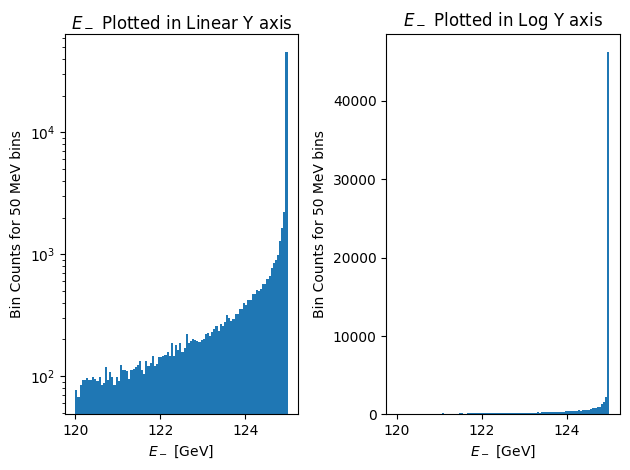

In [20]:
#Python code for REU crashcourse for plotting lumi.ee.out into 1D histograms
#Author: Brendon Madison
#Time: 29th May 2023
#Purpose: See above...

# import the libraries for plotting and reading in
import matplotlib.pyplot as plt
import numpy as np

#Get the data using NumPy's genfromtxt
Em, Ep, posx, posy, posz = np.genfromtxt('/content/drive/MyDrive/REU_Crashcourse/lumi.ee.out',delimiter=' ', usecols=(0,1,2,3,4) ,unpack=True)

#Matplotlib histogram of electron energy with a linear scale
#And then with a logarithmic scale (the data follows exponentials so its easier to see in logarithm)
#We do this to keep them on the same figure
figure, axis = plt.subplots(1, 2)

axis[0].hist(Em,bins=100,range=(120,125.0),log=True)
axis[0].set_title("$E_-$ Plotted in Linear Y axis")
axis[0].set_xlabel("$E_-$ [GeV]")
axis[0].set_ylabel("Bin Counts for 50 MeV bins")

axis[1].hist(Em,bins=100,range=(120,125.0),log=False)
axis[1].set_title("$E_-$ Plotted in Log Y axis")
axis[1].set_xlabel("$E_-$ [GeV]")
axis[1].set_ylabel("Bin Counts for 50 MeV bins")

#This spaces out the plots so they don't overlap
plt.tight_layout()
#We want to save this ... make sure to use the absolute path (always starts with / ) to your data folder so you can keep this all together!
plt.savefig("/content/drive/MyDrive/REU_Crashcourse/ElectronExample.pdf")
#You can download this locally by using the three vertical dots before on the LHS of your screen
plt.show()



You can also save the image by right clicking and *Save image as...*

Now we will rewrite the code to plot all the distributions in both log and linear like the previous

To do this though we will write a simple function to handle the plotting. 

Our function should work as follows:

plot_data(VARIABLE,LO_PERCENT,HI_PERCENT,UNITS,NAME):

--code here

First we will specify the VARIABLE from its name in the code. We then specify the percentile ranges. So have the plot go from the 1% quantile to 99% quantile we would have LO_PERCENT = 1 , HI_PERCENT = 99 

The UNITS should be specified (like GeV) and the NAME should be specified (like $E_-$) and we have assumed the name will be in mathmode ($$)

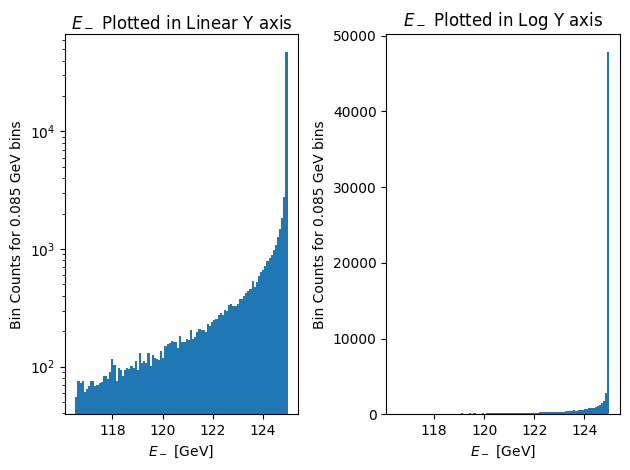

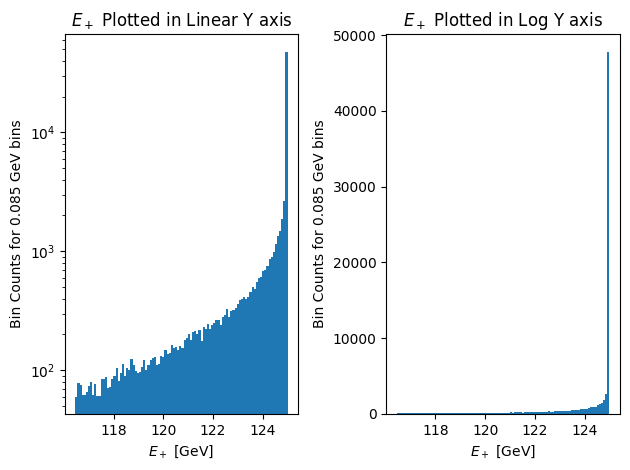

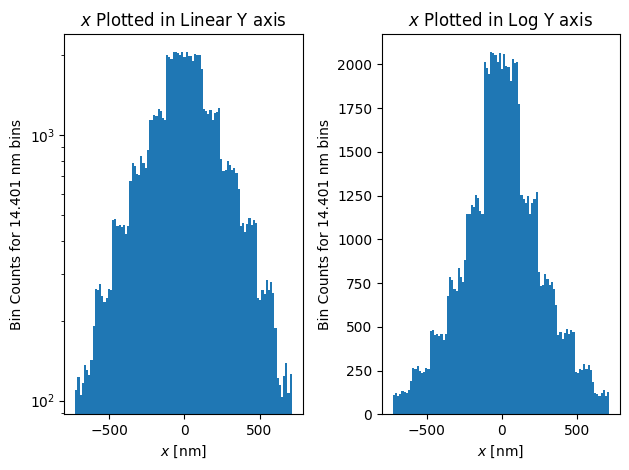

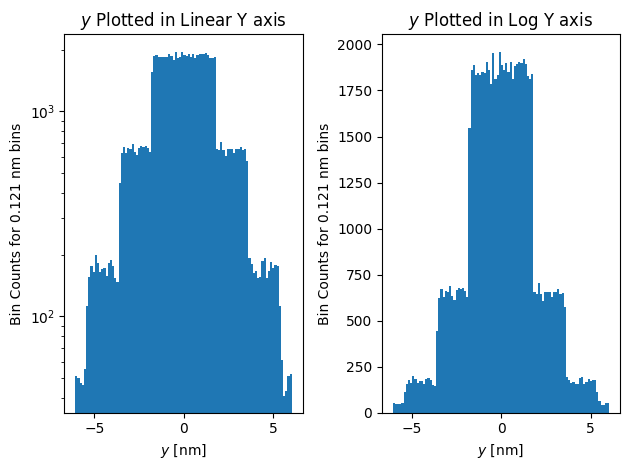

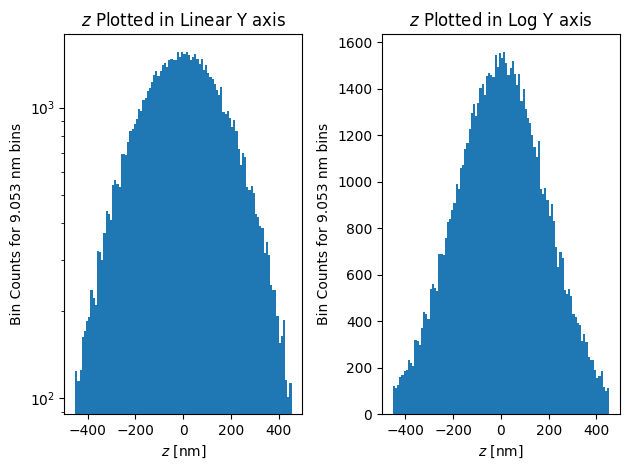

In [24]:
#Python code for REU crashcourse for plotting lumi.ee.out into 1D histograms
#Author: Brendon Madison
#Time: 29th May 2023
#Purpose: See above...

# import the libraries for plotting and reading in
import matplotlib.pyplot as plt
import numpy as np

#defining our plot function
#We assume the user always wants 100 bins
#and then compute the range using the percentages 
#and compute the bin size too
def plot_data(VARIABLE,LO_PERCENT,HI_PERCENT,UNITS,NAME):
  figure, axis = plt.subplots(1, 2)
  low = np.percentile(VARIABLE,LO_PERCENT) #Percentiles SHOULD NOT be divided by 100
  high = np.percentile(VARIABLE,HI_PERCENT) #so 25% is just 25 here
  bin_width = (high - low)/100
  axis[0].hist(VARIABLE,bins=100,range=(low,high),log=True)
  axis[0].set_title("$%s$ Plotted in Linear Y axis" % NAME)
  axis[0].set_xlabel("$%s$ [%s]" % (NAME,UNITS))
  axis[0].set_ylabel("Bin Counts for %0.3f %s bins" % (bin_width,UNITS))

  axis[1].hist(VARIABLE,bins=100,range=(low,high),log=False)
  axis[1].set_title("$%s$ Plotted in Log Y axis" % NAME)
  axis[1].set_xlabel("$%s$ [%s]" % (NAME,UNITS))
  axis[1].set_ylabel("Bin Counts for %0.3f %s bins" % (bin_width,UNITS))

  #This spaces out the plots so they don't overlap
  plt.tight_layout()
  #We want to save this ... make sure to use the absolute path (always starts with / ) to your data folder so you can keep this all together!
  plt.savefig("/content/drive/MyDrive/REU_Crashcourse/LinLogPlot_%s.pdf" % NAME)
  #You can download this locally by using the three vertical dots before on the LHS of your screen
  plt.show()

#Get the data using NumPy's genfromtxt
Em, Ep, posx, posy, posz = np.genfromtxt('/content/drive/MyDrive/REU_Crashcourse/lumi.ee.out',delimiter=' ', usecols=(0,1,2,3,4) ,unpack=True)

#Now we use the plotting function to do what we did before but in one line
#(though the 5 percentile isn't exactly the same as the lower histogram range as before)
plot_data(Em,5.0,100.0,"GeV","E_-")
#But now we can also do the other variables with ease
plot_data(Ep,5.0,100.0,"GeV","E_+")
#The positions are approximately gaussian so we have different quantiles
plot_data(posx,1.0,99.0,"nm","x")
plot_data(posy,1.0,99.0,"nm","y")
plot_data(posz,1.0,99.0,"nm","z")


Now we wish to do 2D histograms to see things like: 

E1 vs E2 

x vs z

E1 vs z

We will make a new function that does 2D histogram and, again, one in linear and one in log. We will also have a 3rd axis that is a "color axis". Our function will be similar to before but now have values for both the histograms

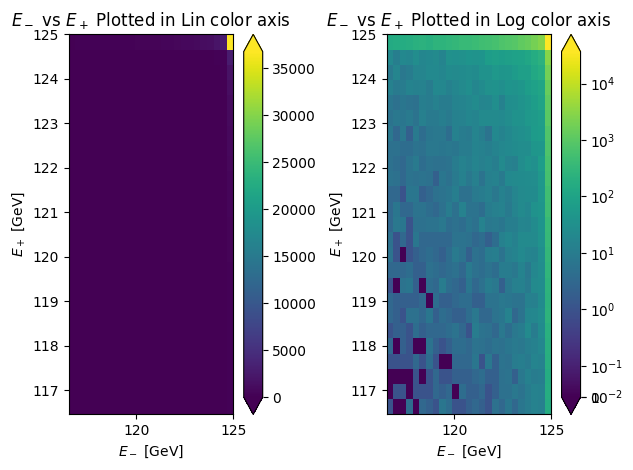

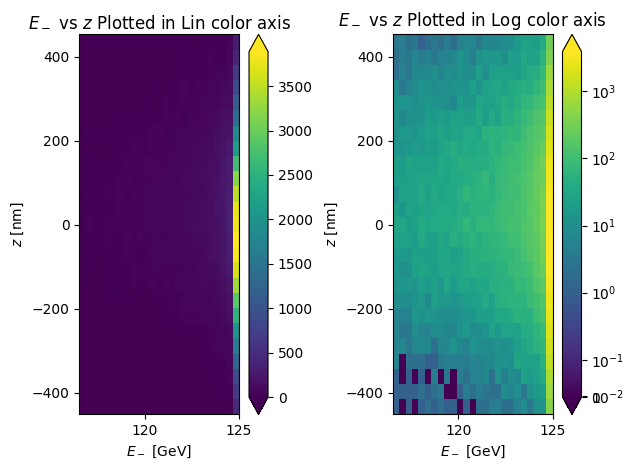

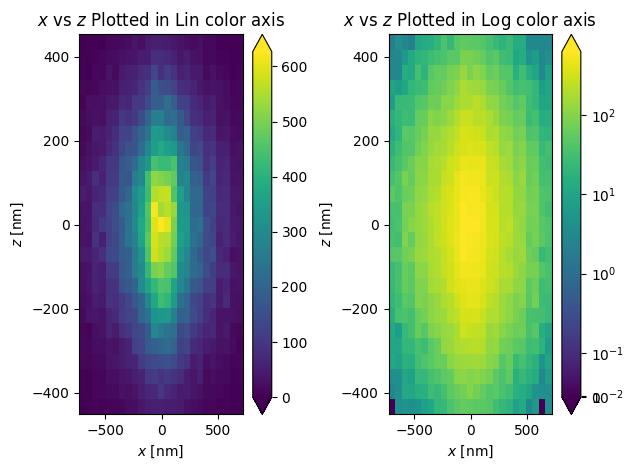

In [30]:
#Python code for REU crashcourse for plotting lumi.ee.out into 1D histograms
#Author: Brendon Madison
#Time: 29th May 2023
#Purpose: See above...

# import the libraries for plotting and reading in
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

#defining our plot function
#We assume the user always wants 100 bins
#and then compute the range using the percentages 
#and compute the bin size too
def plot_data1D(VARIABLE,LO_PERCENT,HI_PERCENT,UNITS,NAME):
  figure, axis = plt.subplots(1, 2)
  low = np.percentile(VARIABLE,LO_PERCENT) #Percentiles SHOULD NOT be divided by 100
  high = np.percentile(VARIABLE,HI_PERCENT) #so 25% is just 25 here
  bin_width = (high - low)/100
  axis[0].hist(VARIABLE,bins=100,range=(low,high),log=True)
  axis[0].set_title("$%s$ Plotted in Linear Y axis" % NAME)
  axis[0].set_xlabel("$%s$ [%s]" % (NAME,UNITS))
  axis[0].set_ylabel("Bin Counts for %0.3f %s bins" % (bin_width,UNITS))

  axis[1].hist(VARIABLE,bins=100,range=(low,high),log=False)
  axis[1].set_title("$%s$ Plotted in Log Y axis" % NAME)
  axis[1].set_xlabel("$%s$ [%s]" % (NAME,UNITS))
  axis[1].set_ylabel("Bin Counts for %0.3f %s bins" % (bin_width,UNITS))

  #This spaces out the plots so they don't overlap
  plt.tight_layout()
  #We want to save this ... make sure to use the absolute path (always starts with / ) to your data folder so you can keep this all together!
  plt.savefig("/content/drive/MyDrive/REU_Crashcourse/LinLogPlot_%s.pdf" % NAME)
  #You can download this locally by using the three vertical dots before on the LHS of your screen
  plt.show()

def plot_data2D(VAR1,LPCN1,HPCN1,UNIT1,NAME1,VAR2,LPCN2,HPCN2,UNIT2,NAME2):
  figure, axis = plt.subplots(1, 2)
  
  low1 = np.percentile(VAR1,LPCN1) #Percentiles SHOULD NOT be divided by 100
  high1 = np.percentile(VAR1,HPCN1) #so 25% is just 25 here
  low2 = np.percentile(VAR2,LPCN2) #Percentiles SHOULD NOT be divided by 100
  high2 = np.percentile(VAR2,HPCN2) #so 25% is just 25 here
  
  #We will only use 25 bins this time
  bw1 = (high1 - low1)/25
  bw2 = (high2 - low2)/25
  
  #get rid of the data outside our quantiles
  trimvar1 = VAR1[VAR1 > low1]
  trimvar1 = trimvar1[trimvar1 < high1]
  trimvar2 = VAR2[VAR2 > low2]
  trimvar2 = trimvar2[trimvar2 < high2]

  #this is the bin edges for the 2D histogram maker
  #it has to be 1 more than how many bins you have (so 101 for 100 bins)
  edges1 = np.linspace(low1,high1,26)
  edges2 = np.linspace(low2,high2,26)

  #use numpy to generate a 2d histogram
  bin_values,_,__ = np.histogram2d(VAR1,VAR2,bins=(edges1, edges2) )
  MESH1, MESH2 = np.meshgrid(edges1,edges2)

  pcmlin = axis[0].pcolormesh(MESH1, MESH2, bin_values.T)
  figure.colorbar(pcmlin, ax=axis[0], extend='both')

  axis[0].set_title("$%s$ vs $%s$ Plotted in Lin color axis" % (NAME1,NAME2))
  axis[0].set_xlabel("$%s$ [%s]" % (NAME1,UNIT1))
  axis[0].set_ylabel("$%s$ [%s]" % (NAME2,UNIT2))

  pcmlog = axis[1].pcolormesh(MESH1, MESH2, bin_values.T, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,vmin=0.0, vmax=np.max(bin_values), base=10))
  figure.colorbar(pcmlog, ax=axis[1], extend='both')
  axis[1].set_title("$%s$ vs $%s$ Plotted in Log color axis" % (NAME1,NAME2))
  axis[1].set_xlabel("$%s$ [%s]" % (NAME1,UNIT1))
  axis[1].set_ylabel("$%s$ [%s]" % (NAME2,UNIT2))
  #axis[0].set_ylabel("Bin Counts for %0.3f %s bins" % (bin_width,UNITS))

  #This spaces out the plots so they don't overlap
  plt.tight_layout()
  #We want to save this ... make sure to use the absolute path (always starts with / ) to your data folder so you can keep this all together!
  plt.savefig("/content/drive/MyDrive/REU_Crashcourse/LinLog2DHist_%s_%s.pdf" % (NAME1,NAME2))
  #You can download this locally by using the three vertical dots before on the LHS of your screen
  plt.show()

#Get the data using NumPy's genfromtxt
Em, Ep, posx, posy, posz = np.genfromtxt('/content/drive/MyDrive/REU_Crashcourse/lumi.ee.out',delimiter=' ', usecols=(0,1,2,3,4) ,unpack=True)

#We use the new plotting function plot_data2D
#(though the 5 percentile isn't exactly the same as the lower histogram range as before)
plot_data2D(Em,5.0,100.0,"GeV","E_-",Ep,5.0,100.0,"GeV","E_+")
plot_data2D(Em,5.0,100.0,"GeV","E_-",posz,1.0,99.0,"nm","z")
plot_data2D(posx,1.0,99.0,"nm","x",posz,1.0,99.0,"nm","z")



#Observe exoplanet_transit

What is the format? Well it isn't rows and columns.

This is known as a JSON formatted file. So to read it we will use the *json* library in Python.

This will read the file as a Python dictionary. A Python dictionary (written as dictionary = {}) is like an array but allows you to make the addresses almost anything instead of just numbers.

So we will do this and then plot the data on an x vs y scatter plot using Matplotlib.

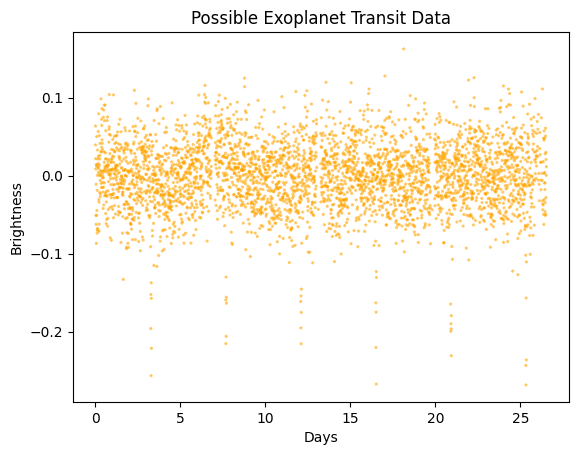

Periods corresponding to lowest brightness:  [4.24881741 2.54929044 1.82092175 1.59330653 1.34173181 1.15876838]
Given a hand calculation we find 6 transits over 25 days so best estimate period is: 4.25 $\pm$ 0.12 days 


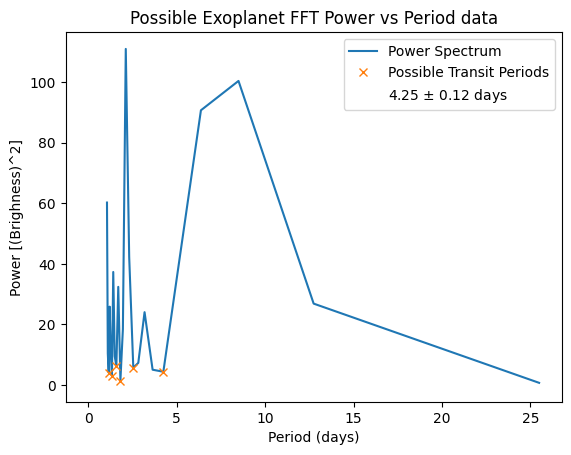

In [104]:
#Python code for REU crashcourse for plotting exoplanet_transit into a scatter plot
#Author: Brendon Madison
#Time: 29th May 2023
#Purpose: See above...

# import the libraries for plotting and reading in
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.signal import find_peaks

#Get the data using json and into the dictionary
ExoDict = json.load(open("/content/drive/MyDrive/REU_Crashcourse/exoplanet_transit"))

#We put some alpha on the plot points so you can see them on top of each other
plt.scatter(ExoDict["x"],ExoDict["y"],alpha=0.5,color="orange",marker="*",sizes=2.5*np.ones(len(ExoDict["x"])))
plt.xlabel("Days")
plt.ylabel("Brightness")
plt.title("Possible Exoplanet Transit Data")
plt.savefig("/content/drive/MyDrive/REU_Crashcourse/Exoplanet1TimeSeries.pdf")
plt.show()

#We want to plot the lower 1% of the data as this represents our transits
#We also can use this to get how many data points we have on the transit , which we will need for estimating the uncertainty later on
n_msrmnts,_,__ = plt.hist(ExoDict["y"],bins=100,range=(np.percentile(ExoDict["y"],0.0),np.percentile(ExoDict["y"],1.0)))
#We don't want to show the plot though so we clear the figure
plt.clf()
#Gets the integral of the number of transit measurements
n_msrmnts = np.sum(n_msrmnts)

#Now the power spectrum:
powspec = np.abs(np.fft.rfft(ExoDict["y"]))**2
#The frequencies associated to the fourier transform
freqs = np.fft.rfftfreq(len(ExoDict["y"]), ExoDict["x"][1]-ExoDict["x"][0])

#We cut off the really high frequency stuff because there are lots of measurements
cutoff = np.argmin(np.abs(freqs - 1.0))
#We convert the frequencies to periods since that is usually what Astronomy uses
periods = 1.0/(freqs[1:cutoff])
#We use scipy to find the peaks
#Except we invert things so that it finds the valleys
#Because the valleys are from the planet blocking the star
#The +10 is arbitrary positive number to make sure we are above the highest peak
peaks, _ = find_peaks(np.max(powspec[1:cutoff])+10-powspec[1:cutoff], distance=1)

print("Periods corresponding to lowest brightness: " ,periods[peaks])

print("Given a hand calculation we find 6 transits over 25 days so best estimate period is: %0.2f $\pm$ %0.2f days " % (periods[peaks][0],np.abs(0.5*(periods[peaks[0]+1]-periods[peaks[0]-1]))/np.sqrt(n_msrmnts)))

plt.plot(periods, powspec[1:cutoff],label='Power Spectrum')
plt.plot(periods[peaks], powspec[1:cutoff][peaks], "x",label='Possible Transit Periods')
plt.plot(0,0,"x",alpha=0.0,label="%0.2f $\pm$ %0.2f days"%(periods[peaks][0],np.abs(0.5*(periods[peaks[0]+1]-periods[peaks[0]-1]))/np.sqrt(n_msrmnts)))
plt.legend()
plt.ylabel("Power [(Brighness)^2]")
plt.xlabel("Period (days)")
plt.title("Possible Exoplanet FFT Power vs Period data")
plt.savefig("/content/drive/MyDrive/REU_Crashcourse/Exoplanet1PeriodSeries.pdf")
plt.show()



First problem:
Can you use this code (and rewrite it a little bit) to figure out the period of exoplanet_transit2 ?

Second problem:
Go to https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/collections and find data that looks like a possible transit and then use this code to get its period.

Bonus problem:
Estimate how long the transit takes (i.e. the width of the 'dip')
